# ゼロから作るDeep Learning

## 3章 ニューラルネットワーク

### 3.5 出力層の設計

#### 3.5.1 恒等関数とソフトマックス関数

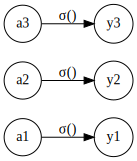

In [3]:
# 恒等関数は、入力をそのまま出力する。

from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')
dg.attr('graph', rankdir='LR')

dg.edge('a1', 'y1','σ()')
dg.edge('a2', 'y2','σ()')
dg.edge('a3', 'y3','σ()')

dg


ソフトマックス関数

$$
y_k = \frac{e^{a_k}}{{\sum_{i=1}^n}e^{a_i}} 
$$

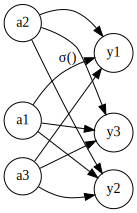

In [11]:
# sソフトマックス関数

from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')
dg.attr('graph', rankdir='LR')

with dg.subgraph() as sg:
  sg.node('a1')
  sg.node('a2')
  sg.node('a3')

with dg.subgraph() as sg:
  dg.node('y1')
  dg.node('y2')
  dg.node('y3')

dg.edge('a1', 'y1', 'σ()')
dg.edge('a1', 'y2')
dg.edge('a1', 'y3')
dg.edge('a2', 'y1')
dg.edge('a2', 'y2')
dg.edge('a2', 'y3')
dg.edge('a3', 'y1')
dg.edge('a3', 'y2')
dg.edge('a3', 'y3')

dg


In [12]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [13]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [15]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [17]:
def softmax(a):
    exp_a = np.sum(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#### 3.5.2 ソフトマックス関数の実装上の注意

$$
\frac{\exp(a_k)}{{\sum^n_{i=1}}\exp(a_i)}
$$


$$
y_k = \frac{\exp(a_k)}{{\sum_{i=1}^n}\exp(a_i)} \\
= \frac{C\exp(a_k)}{C{\sum_{i=1}^n}\exp(a_i)} \\
= \frac{\exp(a_k + \log{C})}{{\sum_{i=1}^n}\exp(a_i+\log{C})} \\
= \frac{\exp(a_k + C')}{{\sum_{i=1}^n}\exp(a_i+C')} \\
$$

In [1]:
import numpy as np
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-1-a51030067ddc>:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-1-a51030067ddc>:3: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [2]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [3]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [4]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)   # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#### 3.5.3 ソフトマックス関数の特徴

In [3]:
import numpy as np
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


- ソフトマックス関数の出力の総和は１となる。
- この性質のおかげで、ソフトマックス関数の出力は「確率」として解釈できる
- 上の例では以下のように解釈できる
  * y[0]の確率は 0.018(1.8%)
  * y[1]の確率は 0.245(24.5%)
  * y[2]の確率は 0.737(73.7%)
